# Datan suodattimien vertailu

Käytämme tehtävissä CMS:n tutkimusdataa. Relevanttien tapahtumien löytäminen valtavasta informaatiotulvasta vaatii kuitenkin datan suodatusta joillakin kriteereillä. Kriteerien valinta on tärkeä vaihe, koska niiden avulla voidaan keskittyä tietyn tyyppisiin tapahtumiin. On tärkeää valita kriteerit oikein ettei dataa vääristellä näyttämään haluttua tulosta. 
> Tiukemmat kriteerit tarkoittavat aina tutkittavan datamäärän pienenemistä mutta toisaalta löysillä kriteereillä kiinnostavat tapahtumat voivat hukkua taustakohinaan.

Tehtävänä on verrata CMS:n avoimen datan portaalista löytyviä tiedostoja ja havaita valintakriteerien vaikutus saatuihin tuloksiin.

### Liipaisu järjestelmä 

CMS-ilmaisimessa törmäytetään protoni ryppäitä noin **40 miljoonaa** kertaa sekunnissa tämä tarkoittaa noin **miljardia** (1 000 000 000 = $10^9$) protoni-protoni vuorovaikutusta joka sekuntti. Tämä tuottaa käsittämättömän määrän dataa, jota on karsittava reilusti ennen kuin sitä voi mitenkään hyödyntää. [1]

#### 1. vaihe
Ensimmäisen vaiheen liipaisin on täysin automaattinen ja se karsii datasta jo noin 99,7% pois. Ensimmäisen liipaisimen täytyy olla todella nopea, sen täytyy tehdä valita noin 25 nanosekunnissa ennen kuin seuraava protonirypäs saapuu. Vain harva protonien välisistä vuorovaikutuksista johtaa suurienergisiin törmäyksiin joita 1 asteen liipaisin tunnistaa. [1]

#### 2. vaihe
Seuraava vaihe informaatio vyöryn käsittelyssä on luoda törmäykseen liittyvistä tuhansien eri ilmaisimien lähettämistä signaaleista kokonaisuus. Tätä kokonaisuutta kutsutaan "tapahtumaksi" (event). 2 vaiheen liiipaisin saa joka sekuntti noin 100 000 tapahtumaa jotka se koostaa kokonaisuuksiksi ja lähettää edelleen "tietokonefarmille" [1]

"Tietokonefarmilla" toimii yli 1000 tietokonetta jotka suorittavat monimutkaisia laskuja ja testejä tapahtumille. Tuloksena säilytetään noin 100-1000 tapahtumaa, loput 99900-99000 hävitetään joka sekuntti.                      [1]

Ronskin karsintaprosessin jälkeenkin CMS tuottaa valtavasti dataa, jota tutkijat analysoivat vuosia. Tarkka tutkimustyö tehdään siihen tarkoitetuilla ohjelmointikielillä mutta käyttämämme _csv_ tiedostot sisältävät samaa autenttista dataa. Data ei ole tarkkaa vaan siinä on aina taustakohinaa. Tarkoitus ei olekkaan suodattaa datasta kaikkea "ylimääräistä", vaan juuri tutkia käyttäytyvätkö hiukkaset ennusteemme mukaisesti vai onko kenties poikkeamia. 



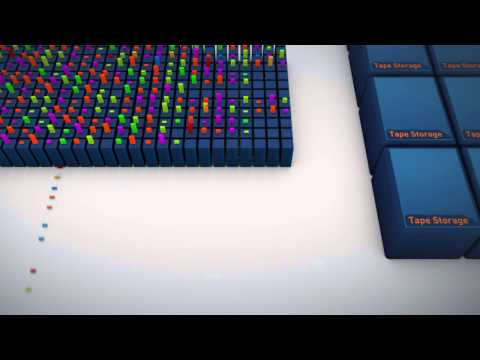

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('jDC3-QSiLB4')
#https://youtu.be/jDC3-QSiLB4

**** 
## Tehtävä
Tutkitaan CMS:n [avoimen datan portaalista](http://opendata.cern.ch/record/545) löytyviä tiedostoja _'Zmumu.csv'_ ja _'Zee.csv'_. Tiedostot on tallennettu CMS:n 2011 ajoista, mutta niissä on käytetty eri kriteerejä liipaisujärjestelmän toisessa vaiheessa. 
- _'Zmumu.csv'_ 
    - Tapahtumassa havaittiin kaksi myonia
    - Myonien liikemärät olivat tarpeeksi suuret: $p_T > 20GeV$
    - Myonit osuivat ilmaisimen tarkimpiin osiin: $|pseudorapiditetti| < 2.1$
    - Kahden myonin invariantti massa asettui välille $60GeV < M < 120GeV$
- _'Zee.csv'_
    - Tapahtumassa havaittiin kaksi elektronia
    - Elektronien liikemäärät olivat tarpeeksi suuret: $p_T > 25GeV$
    - Kahden elektronin invariantti massa asettui välille $60GeV < M < 120GeV$
    
    [2]

Tutkitaan histogrammien avulla millaisia eroja ja yhtäläisyyksiä liipaisimen kriteerit aiheuttavat.

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Haetaan data ja tallennetaan se muuttujiin _'zee'_ ja _'zmumu'_. Nimet viittaavat Z bosonin hajoamisreitteihin. 

In [ ]:
zee = pandas.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zee_Run2011A.csv')
zee.head()

In [ ]:
zmumu = pandas.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zmumu_Run2011A.csv')
zmumu.head()

Luonnollinen suure tiedostojen vertailuun on invariantti massa. Sitä ei kuitenkaan ole valmiiksi laskettu haetuissa tiedostoissa. Onneksi tämä onkin jo tehtävästä: _'1-Laske-invariantti-massa.ipynb'_  tuttu ongelma ja osaamme ratkaista sen muutamalla rivillä Python koodia. 
> Laske invariantit massat molemmille tiedostoille. Apua saat [tehtävästä 1](https://mybinder.org/v2/gh/cms-opendata-education/cms-jupyter-materials-finnish/master?filepath=Oppimiskokonaisuudet%2FAvoin-data-hiukkasfysiikassa%2F3_Data-analyysi%2F1_Laske-invariantti-massa.ipynb).
<br>
$\color{purple}{\text{Korvaa alla olevasta koodista '???'  invariantin massan laskuilla }}$.

In [ ]:
m_zee = ???
m_zmumu = ???

Piirretään molempien tiedostojen invariantit massat samaan histogrammiin, jotta niitä olisi helppo vertailla.

In [ ]:
plt.xlabel('Invariantti massa [GeV]')
plt.ylabel('Tapahtumien lukumäärä')
plt.title('Kahden myonin invariantti massa, vertailu eri suodattimilla \n')
plt.hist(m_zee, bins=50, range=(80,100), alpha=0.5, label='zee')
plt.hist(m_zmumu, bins=50, range=(80,100), alpha=0.5, label='zmumu')
plt.legend (loc='upper right')
plt.show()

****
## $\color{green}{\text{Pohdintaa}}$

Invariantissa massassa on molemmissa tiedostoissa selvä piikki noin 90GeV kohadalla. 
 - Minkä hiukkasen hajoamiseen piikki liittyy?
 - Mitä piikin muoto kertoo?
 - Kummassa mittauksessa on vähemmän kohinaa, eli tulos on ns. tarkempi? 

****
### Elektronien ja myonien havitseminen
CMS on kehitetty erityisesti myonien havaitsemiseen. Myonit kulkevat elektroneja pitemmän matkan ilmaisimessa ja jättävät pitemmälle välille signaaleja. Pitemmällä matkalla niiden rata ehtii myös kaartua enemmän vahvan magneettikentän vaikutuksesta. Nämä seikat tekevät myonihavainnoista hieman tarkempia.
Toisaalta esimerkissä käytettiin hyvin suurienergisiä hiukkasia. Elektronien mittaus on sitä tarkempaa, mitä enemmän liike-energiaa niillä on. Elektroni kalorimetrissä suurempi energiset elektronit aiheuttavat vahvemman signaalin johon kohina vaikuttaa vähemmän. Myoneita taas saadaan mitattua sitä terkemmin, mitä vähemmän niillä on liike-energiaa. Tällöin niiden rata kaartuu enemmän magneettikentässä.

$\color{green}{\text{Kokeile itse}}$ piirtää kahden eri tiedoston invariantit massat samaan histogrammiin ja tulkitse tuloksia. Tidostoja löydät kansiosta : _cms-opendata-education/cms-jupyter-materials-finnish/master/Data_

In [ ]:
#Kirjoita oma koodisi tähän

****
## Lähteet
[1] Liipaisujärjestelmän toiminta, Triggering and Data Acquisition, luettu 6.2019.
Url: https://cms.cern/detector/triggering-and-data-acquisition


[2] Datasets derived from the Run2011A SingleElectron, SingleMu, DoubleElectron, and DoubleMu primary datasets
McCauley, Thomas;
Url:http://opendata.cern.ch/record/545